In [1]:
import pandas as pd
import numpy as np
import seaborn as sna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
dataset = pd.read_csv('Ecommerce Customers.csv')
dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
dataset.shape

(500, 8)

In [5]:
dataset.columns


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
dataset.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
dataset.rename(index = str, columns = {'Avg. Session Length':'Avg._Session_Length', 'Time on App':'Time_on_App','Time on Website':'Time_on_Website', 'Length of Membership':'Length_of_Membership', 'Yearly Amount Spent':'Yearly _Amount_Spent'},inplace = True)

In [8]:
dataset

,Email,Address,Avatar,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly _Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [9]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg._Session_Length     0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly _Amount_Spent    0
dtype: int64

In [11]:
dataset.drop(['Address','Email'],axis=1,inplace=True)

In [32]:
dataset.drop(['Avatar'],axis=1,inplace=True)

In [34]:
dataset

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly _Amount_Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [35]:
dataset.info

<bound method DataFrame.info of      Avg._Session_Length  Time_on_App  Time_on_Website  Length_of_Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Ye

In [36]:
dataset . shape

(500, 5)

In [37]:
X=dataset.iloc[ : , : -1]. values
Y=dataset.iloc[ :, -1] . values

In [38]:
dataset . isnull() .sum()

Avg._Session_Length     0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly _Amount_Spent    0
dtype: int64

In [39]:
dataset . isnull() . sum().sort_values(ascending=False)

Avg._Session_Length     0
Time_on_App             0
Time_on_Website         0
Length_of_Membership    0
Yearly _Amount_Spent    0
dtype: int64

In [40]:
dataset [dataset. isnull() .any(axis=1 )] . head()

,Avg._Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly _Amount_Spent


In [41]:
X_train,X_test ,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [42]:
print(X_train)

[[31.7207699  11.75234317 38.57360523  5.0239342 ]
 [33.75499473 12.06415663 37.27122169  3.97055563]
 [32.86530121 12.07483017 35.56917032  2.39907979]
 ...
 [33.05926409 11.7259101  35.9990993   5.00482058]
 [32.7267846  12.98851015 36.46200326  4.11322612]
 [34.48238805 13.28303287 35.90729843  4.96874267]]


In [43]:
print(Y_train)

[538.7749335 547.3651406 411.1869636 503.1750852 589.0264898 515.5024797
 436.2834981 510.1598173 483.673308  451.7278633 510.4013885 537.9157529
 534.7714849 478.1830597 425.745092  434.0216998 384.6265716 578.2416051
 619.8956399 597.7398789 599.406092  564.790969  533.0400602 409.0704721
 637.1024479 472.9922467 583.977802  482.3535703 627.6033187 514.2395207
 436.5156057 408.6201878 534.7057438 410.6029439 470.4527333 530.3624689
 256.6705823 540.2634004 547.1907494 512.5525344 462.8976362 506.3758668
 541.9722038 497.7786422 541.049831  438.3037078 468.9135013 487.6462317
 482.1449969 529.0490041 413.2959992 596.516698  442.6672517 387.5347163
 521.1953105 424.2028271 550.0475806 494.5518611 497.3895578 483.1597208
 442.7228916 581.7987977 565.9943634 368.6547849 505.1133435 319.9288698
 475.0154071 439.0747667 587.5747995 407.8763782 604.8413188 484.8769649
 515.8288149 452.3156755 560.5601606 505.7711403 512.8253581 426.775216
 402.1671222 578.9862586 524.7976276 532.9352188 630

In [44]:
print(X_test)

[[32.4914466  12.53035737 37.8752191   2.47613905]
 [32.7111193  12.32629139 36.67387836  3.35027929]
 [33.07773079 11.46698422 35.67572763  1.80922959]
 [32.21292383 11.73299146 35.63395395  4.33186303]
 [32.77049216 11.37176736 35.26149812  4.03438613]
 [30.73772037 12.63660605 36.21376309  3.35784684]
 [33.56647439 12.23565925 37.27757338  2.53204406]
 [32.24635    11.30555143 37.13312676  1.70738973]
 [34.56868085 11.37808709 38.30447119  3.78493211]
 [31.94539575 12.96576148 36.9663889   6.07665364]
 [32.68624509 12.63857212 36.09722093  4.29773748]
 [32.67294353 12.27605698 37.19279353  3.98247151]
 [35.86023651 11.73066139 36.88214908  3.41620998]
 [34.39432665 12.80775183 38.55103029  1.81007988]
 [31.86483255 13.44340599 36.87831537  2.36108695]
 [32.83789305 13.18518117 35.92159519  1.82359518]
 [34.20053941 12.66780888 37.48704925  3.70162229]
 [33.34450869 10.96980287 35.97457811  2.62762497]
 [36.13966249 12.05026723 36.95964319  3.86486074]
 [32.86532717 11.98441752 37.04

In [45]:
print(Y_test)

[449.0703194 482.6024673 374.2696745 513.1531119 502.7710746 461.7807422
 466.4211988 327.3779526 528.2238094 657.0199239 571.4710341 523.6339351
 546.5566669 467.4278485 439.8912805 445.0621855 553.9946736 403.7669021
 595.8038189 490.7386321 712.3963268 502.0925279 398.1634685 570.4517259
 549.8605905 392.9922559 419.9387748 407.6571788 521.1429518 463.7459811
 556.2981412 506.5473071 514.3365583 476.7667242 418.6027421 403.8195198
 506.1323424 436.7205559 558.9481124 421.3266313 478.2621264 593.915003
 632.1235881 591.4377356 444.2859075 392.2049334 558.4272572 447.1876443
 475.7250679 420.7376732 527.7829958 421.9667942 576.0252441 460.0612774
 452.627255  408.6403511 557.2526867 298.7620079 555.0683941 486.0834255
 488.7860611 423.3083341 458.7811317 574.4156896 489.9080531 352.5501082
 492.6060127 427.3565308 628.0478039 478.7193569 463.923513  765.5184619
 501.1224915 462.6565189 373.8857237 384.3260571 614.7296376 518.064558
 510.5014785 432.7207178 473.9498574 501.2091727 535.

In [46]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [47]:
print(X_train)

[[-1.43869753 -0.30628075  1.45477717  1.47980564]
 [ 0.72930762  0.00889083  0.1928528   0.40660492]
 [-0.21889638  0.01967932 -1.45632353 -1.19444246]
 ...
 [-0.01217758 -0.33299849 -1.0397505   1.46033234]
 [-0.36652251  0.94319928 -0.59122687  0.55196014]
 [ 1.5045378   1.2408939  -1.12869953  1.42357553]]


In [58]:
reg= LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [59]:
reg.intercept_

502.3944236152

In [60]:
reg.coef_

array([24.2517772 , 38.4022506 ,  0.2083891 , 60.60770351])

In [68]:
pred=reg.predict(X_test)

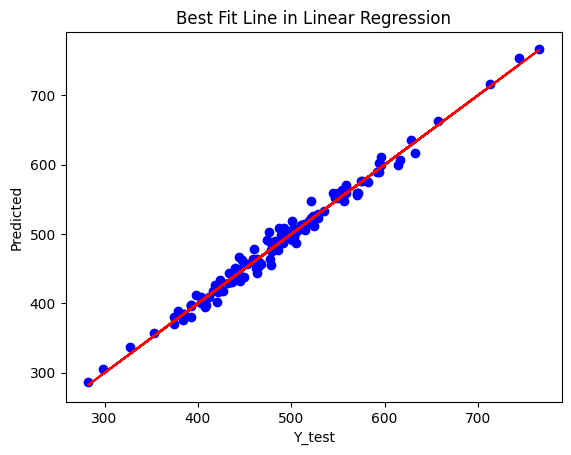

In [90]:
plt.scatter(Y_test, pred, color = 'blue')
plt.plot(Y_test,Y_test,color = 'red', linewidth = 1.5)
plt.xlabel('Y_test')
plt.ylabel('Predicted')
plt.title('Best Fit Line in Linear Regression')
plt.show()

<ipython-input-92-57975588e45e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sna.distplot((Y_test-pred),bins=50)


<Axes: ylabel='Density'>

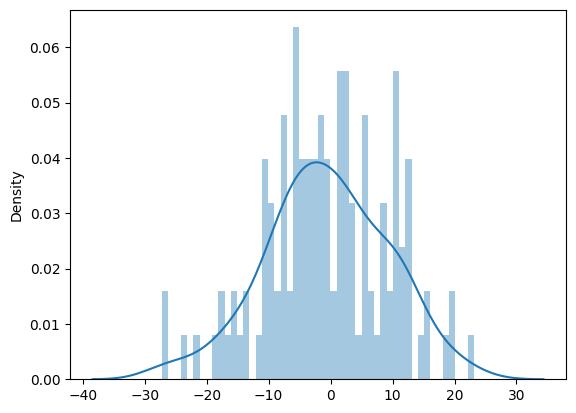

In [92]:
sna.distplot((Y_test-pred),bins=50)